In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
# This loads the data from the .csv files provided
# adjusts x1 and x2 to range between 0,1
# this is done by taking the max as 1 and the min as 0
data = pd.read_csv('data.csv', header=None)
x1 = (data[0] - data[0].min()) / (data[0].max() - data[0].min())
x2 = (data[1] - data[1].min()) / (data[1].max() - data[1].min())
y = data[2].values
X = np.column_stack((x1, x2)) 

In [8]:
# setting up the weights, bias, learning_rate, and iterartions
# the learning_rate and iterations can be changed to get new results
# the more iterations the more trainging the model goes through
weights = np.random.rand(2)
bias = np.random.rand()
learning_rate = 1
iterations = 100

In [10]:
# the prediction is used to calculate an output based on the model parameters
def predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return np.where(linear_output >= 0, 1, 0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


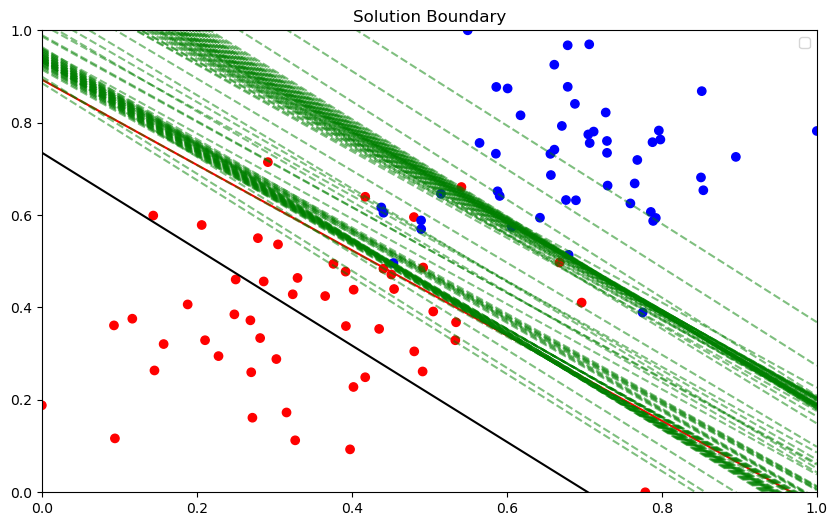

In [28]:
# updatedW is the updated weight
# this is doene by getting the error from the actual vs the predicted
# the weights is updated by taking the error and learning_rate to give an updated weight
# what should happen here is that with more iterations the prediction error should reduce
def updatedW(X, y, weights, bias, learning_rate):
    predictions = predict(X, weights, bias)
    error = y - predictions
    weights += learning_rate *  np.dot(error, X)
    bias += learning_rate * np.sum(error)
    return weights, bias
    
plt.figure(figsize=(10,6))
plt.scatter(x1, x2, c=y, cmap='bwr')

# plots the boundary using random weights and boundaries
# The boundary was kept between 0 and 1 to avoid large outliers
# slope gets calculated based on the weights ratio
# intercept is based on the bias
x_values = np.array([0, 1])
if weights[1] != 0:
    initial_slope = -weights[0] / weights[1]
    initial_intercept = -bias / weights[1]
else:
    initial_slope = 0
    initial_intercept = 0
initial_y_values = initial_slope * x_values + initial_intercept
plt.plot(x_values, initial_y_values, 'r-')

# here is where the "training" is done
# plots the green dahses seen in the grpah
# what this does is updates the weights and bias
for epoch in range(iterations):
    weights, bias = updatedW(X, y, weights, bias, learning_rate)
    if epoch < iterations - 1:
        if weights[1] != 0:
            slope = -weights[0] / weights[1]
            intercept = -bias / weights[1]
        else:
            slope = 0
            intercept = 0
        y_values = slope * x_values + intercept
        plt.plot(x_values, y_values, 'g--', alpha = 0.5)

# this gives out the final boundary after everything is ran
if weights[1] != 0:
    f_slope = -weights[0] / weights[1]
    f_intercept = -bias / weights[1]
else:
    f_slope = 0
    f_intercept = 0
f_y_values = f_slope * x_values + f_intercept
plt.plot(x_values, f_y_values, 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.title("Solution Boundary")
plt.show()